In [10]:
from langgraph.graph import StateGraph, START, END
from langchain_groq import ChatGroq
from dotenv import load_dotenv
from typing import TypedDict, Annotated
from pydantic import BaseModel, Field
from langchain_core.messages import SystemMessage, HumanMessage
import operator
from Get_Job_Category import predict_resume_category, cleanResume

d:\CODING\AI Based Resume Analyzer\.venv\Lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator KNeighborsClassifier from version 1.5.2 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
d:\CODING\AI Based Resume Analyzer\.venv\Lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator LabelBinarizer from version 1.5.2 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
d:\CODING\AI Based Resume Analyzer\.venv\Lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator OneVsRestClassifier from version 

In [4]:
load_dotenv()

True

In [5]:
model = ChatGroq(model='llama-3.3-70b-versatile')

In [7]:
model.invoke("Prime Minister of India? ").content

'The current Prime Minister of India is Narendra Modi. He has been serving as the Prime Minister since May 26, 2014.'

In [ ]:
class ResumeState(TypedDict):

    resume_content: str
    ats_score: int
    overall_score: int
    ai_job_category: str
    ml_job_category: str
    strengths: str
    weakness: str
    key_improvements: str
    conclusion: str

In [25]:
from pydantic import BaseModel, Field

class ResumeSchema(BaseModel):
    ats_score: int = Field(..., ge=0, le=100, description="ATS score (0–100)")
    overall_score: int = Field(..., ge=0, le=100, description="Overall score (0–100)")
    ai_job_category: str = Field(..., description="Job Category for the respected Resume")
    strengths: str = Field(..., description="Strengths in Resume")
    weakness: str = Field(..., description="Weakness in Resume")
    key_improvements: str = Field(..., description="Key Improvements in Resume")
    conclusion: str = Field(..., description="Conclusion with some brief points based on the given Resume")

In [28]:
def evaluate_resume(state: ResumeState) -> ResumeState :
    
    structured_model = model.with_structured_output(ResumeSchema)

    messages = [
        SystemMessage(content="You are a Strict evaluater. Evaluate the provided Resume"), 
        HumanMessage(content=f"""
            Evaluate the following Resume : "{state['resume_content']}" 

            ### Respond ONLY in structured format:
            - strengths : Should be in points
            - weakness : Should be in points
            - key_improvements : : Should be in points
""")
    ]

    response = structured_model.invoke(messages)

    state['ats_score'] = response.ats_score
    state['overall_score'] = response.overall_score
    state['ai_job_category'] = response.ai_job_category
    state['strengths'] = response.strengths
    state['weakness'] = response.weakness
    state['key_improvements'] = response.key_improvements
    state['conclusion'] = response.conclusion

    return state

In [29]:
def get_job_category(state: ResumeState) -> ResumeState:
    resume_content = state['resume_content']
    category_name = predict_resume_category(resume_content)
    state['ml_job_category'] = category_name
    return state

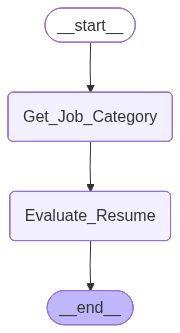

In [31]:
graph = StateGraph(ResumeState)

graph.add_node("Evaluate_Resume", evaluate_resume)
graph.add_node("Get_Job_Category", get_job_category)

graph.add_edge(START, "Get_Job_Category")
graph.add_edge("Get_Job_Category", "Evaluate_Resume")
graph.add_edge("Evaluate_Resume", END)

## Compile the graph
workflow = graph.compile()

workflow


In [32]:
my_resume = """ 

 Education
 Graphic Era Hill University
 Bachelor of Technology (B.Tech) in Computer Science Engineering; GPA: 8.62 / 10
 Technical Skills
 Dehradun, Uttarakhand
 August 2022– Present
 • Programming Languages: C, C++, Python, Java, JavaScript, HTML, CSS
 • Databases: MySQL, MongoDB, Oracle
 • Frameworks & Libraries: Tensorflow, Pandas , Scikit-learn, React js, Langchain
 • Developer Tools: Git, GitHub, Docker, IBM Cloud
 • Specialized Skills: Artificial Intelligence, Machine Learning, Natural Language Processing (NLP), Generative AI,
 Prompt Engineering
 • Coding Platforms: Leetcode (500+ problems), GeeksForGeeks (100+ problems)
 Experience
 IBM SkillsBuild Internship Program
 Intern
 Remote
 July 2025– August 2025
 • Completed a 4-week virtual internship focused on Cloud Computing and Artificial Intelligence using IBM
 Cloud Lite.
 • Gained practical exposure through IBM 3 learning modules-Getting Started with AI, Journey to Cloud & RAG Lab
 • Developed a Network Intrusion Detection System with 99.5% accuracy using Watsonx.ai and AutoAI.
 • Built and demonstrated an Agentic AI Nutrition Assistant leveraging LLaMA-3-2-90B, clearly communicating
 design decisions and outcomes to mentors.
 Projects
 Stock Price Prediction — Deep Learning, LSTM
 July 2025– August 2025
 • Designed and trained an LSTM-based deep learning model for stock trend prediction using 100,000+ historical data
 points.
 • Enhanced prediction reliability by 28% and launched a Streamlit web app, providing 50+ users with an intuitive
 interface to explore and visualize stock forecasts in real time.
 • Translated complex model outputs into clear insights through concise presentations, fostering cross-team
 understanding and accelerating iteration cycles by 15%.
 SMS Spam Detection — Machine Learning, NLP, Python, Streamlit
 June 2025– July 2025
 • Achieved 99.1% accuracy by designing a spam detection model with NLP preprocessing on 5,500+ messages, and
 clearly communicated performance metrics to stakeholders for informed decision-making.
 • Applied 3+ ML algorithms including Extra Trees Classifier, and deployed the best-performing model as a Streamlit
 web app to ensure accessibility for non-technical users.
 Movie Recommender System — Cosine Similarity, NLP, Python, Streamlit
 May 2025– June 2025
 • Built a content-based movie recommender system using TF-IDF vectorization on 18,000+ movie descriptions.
 • Optimized recommendation accuracy by 30% through cosine similarity–based scoring, and communicated findings
 in team review sessions.
 AI Doctor Assistant — Python, Gradio, Groq API, Whisper, LLaMA-4, gTTS April 2025– May 2025
 • Developed a multimodal AI assistant with Gradio, enabling real-time speech and image-based medical consultations
 with 90%+ transcription accuracy.
 • Integrated Whisper-v3 and LLaMA-4 to process voice and image inputs, generating doctor-like diagnostic responses
 in under 10 seconds.
 • Automated voice feedback using gTTS, reducing manual consultation simulation time by 70%, and presented the
 system to peers through live demos for feedback.
 Achievements
 • AWS Artificial Intelligence and Machine Learning Practitioner- [Certificate]
 • IBM Cloud AI Foundations- [Certificate]
 • PwC Launchpad Trainee (Cyber Security)- [Certificate]
 • Physics Wallah- Data Science Masters- [Certificate

"""

In [33]:
## Execute the Graph
initial_state = {'resume_content': my_resume}
final_state = workflow.invoke(initial_state)

print(final_state)

{'resume_content': ' \n\n Education\n Graphic Era Hill University\n Bachelor of Technology (B.Tech) in Computer Science Engineering; GPA: 8.62 / 10\n Technical Skills\n Dehradun, Uttarakhand\n August 2022– Present\n • Programming Languages: C, C++, Python, Java, JavaScript, HTML, CSS\n • Databases: MySQL, MongoDB, Oracle\n • Frameworks & Libraries: Tensorflow, Pandas , Scikit-learn, React js, Langchain\n • Developer Tools: Git, GitHub, Docker, IBM Cloud\n • Specialized Skills: Artificial Intelligence, Machine Learning, Natural Language Processing (NLP), Generative AI,\n Prompt Engineering\n • Coding Platforms: Leetcode (500+ problems), GeeksForGeeks (100+ problems)\n Experience\n IBM SkillsBuild Internship Program\n Intern\n Remote\n July 2025– August 2025\n • Completed a 4-week virtual internship focused on Cloud Computing and Artificial Intelligence using IBM\n Cloud Lite.\n • Gained practical exposure through IBM 3 learning modules-Getting Started with AI, Journey to Cloud & RAG Lab

In [34]:
final_state.get('ats_score')

95